# Cloud Computing Tutorial

For ICESat-2 UW Hackweek 2022

<img src='https://media0.giphy.com/media/r3Yeh3aAjsyYGObizC/giphy.gif' alt='cloud bouncing and smiling' style='width:350px' />

# Icebreaker questions

Enter your answers in chat or in your own text editor of choice.

* Is everyone who wants to be logged into their jupyterhub and have the notebook open?
* When you hear the term "cloud computing" what's the first thing that comes to mind?
* What concepts or tools are you hoping to learn more about in this tutorial?


***

# Learning Objectives

1. The difference between code running on your local machine vs a remote environment.
2. The difference between data hosted by cloud providers, like AWS, and on-prem data centers
3. The difference between how to access data hosted by NASA DAACs, on-prem, cloud/s3
4. Cloud computing tools for scaling your science

# Key Takeaways

* At least one tutorial (or tool) to try

***
# Sections

1. Local vs Remote Resources
2. Data on the Cloud vs On-premise
3. How to access NASA data
4. Tools for cloud computing: Brief introduction to Dask

***
# Setup: Getting prepared for what's coming!!!

* Each section includes some key learning points and at least 1 exercise.
* Configure your screens so you can see both the tutorial and your jupyterhub to follow along.
* Let's all login into https://urs.earthdata.nasa.gov/home before we get started.
* The bottom lists many other references for revisiting.
* Let's install some libraries for this tutorial.

***

# 1. Local vs Remote Resources

## ❓🤔❓ Question for the group:

What's the difference between running code on your local machine this remote jupyterhub?

As you are probably aware, this code is running on machine somewhere in Amazon Web Services (AWS) land.

<img src='images/aws-data-centers.png' alt='aws data centers' style='width:400px' />

## What types of resources are available on this machine?

### CPUs

The central processing unit (CPU) or processor, is the unit which performs most of the processing inside a computer. It processes all instructions received by software running on the PC and by other hardware components, and acts as a powerful calculator. [Source: techopedia.com](https://www.techopedia.com/definition/2851/central-processing-unit-cpu)

In [1]:
# How many CPUs are running on this machine?
!lscpu | grep ^CPU\(s\):

CPU(s):              4


### Memory

Computer random access memory (RAM) is one of the most important components in determining your system’s performance. RAM gives applications a place to store and access data on a short-term basis. It stores the information your computer is actively using so that it can be accessed quickly. [Source: crucial.com](https://www.crucial.com/articles/about-memory/support-what-does-computer-memory-do)

In [2]:
# How much memory is available?
!free -h

              total        used        free      shared  buff/cache   available
Mem:            15G        2.8G        3.9G        684K        8.7G         12G
Swap:            0B          0B          0B


If you're curious about the difference between free and available memory: https://haydenjames.io/free-vs-available-memory-in-linux

## 🏋️ Exercise: How many CPUs does your machine have

Unless you are using a linux machine, the above commands probably won't give you what you need.

1. For MAC users: `sysctl -a | grep cpu | grep hw` or https://www.linux.com/training-tutorials/5-commands-checking-memory-usage-linux/
2. For Windows users: https://www.top-password.com/blog/find-number-of-cores-in-your-cpu-on-windows-10/ (Not tested)

## ❓🤔❓Question for the group

When might you want to use a remote machine and when might you want to use your local machine?

***

# 2. Data on the Cloud vs On-premise

## What's the difference between data hosted on the cloud and on-prem data centers?

<img alt='NASA Distributed Active Archive Centers (DAACs)' src='https://pbs.twimg.com/media/Dj7jIwwUUAAnskf?format=jpg&name=small' />

NASA DAACs are in the process of migrating their collections to the "Earthdata Cloud". At this time, most datasets are still located and accessible "on-premise" from NASA DAACs, while high priority and new datasets are being stored on AWS Simple Storage Service (S3). Given different use cases, you will need to access datasets from NASA DAAC's as well as on NASA's Earthdata Cloud (AWS S3).

* Datasets are still managed by the DAAC, but the DAAC stores files on AWS S3.
* The DAACs' services will be collocoated in the cloud with the data.
* Users are encouraged to access the data collocated in the cloud through AWS computer services (like this jupyterhub!)


## 🏋️ Exercise

Navigate search.earthdata.nasa.gov and search for ICESat-2 and answer the following questions:

1. Which DAAC hosts ICESat-2 datasets?
2. Which ICESat-2 datasets are hosted on the AWS Cloud and how can you tell?

## What did we learn?

NASA has a new cloud paradigm, which includes data stored both on-premise as well as on the cloud. NASA DAACs are providing services also on AWS.

PO.DAAC has a great diagram for this new paradigm, source https://podaac.jpl.nasa.gov/cloud-datasets/about

![Cloud_ecosystem_diagram](https://podaac.jpl.nasa.gov/sites/default/files/content/CLOUD_Data_Pages/Cloud_ecosystem_diagram.jpg)

## Final thought: Other cloud data providers

AWS is of course not the only cloud provider and Earthdata can be found on other popular cloud providers.

* [Google Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets)
* [Microsoft Planetary Computer Data Catalog](https://planetarycomputer.microsoft.com/catalog)
* AWS also has its public data registry [Open Data on AWS](https://aws.amazon.com/opendata/) and its sustainability data initiative with its [Registry of Open Data on AWS: Sustainability Data Initiative](https://registry.opendata.aws/collab/asdi/)

***

# 3. How to access NASA data

How do we access data hosted on-prem and on the cloud? What are some tools we can use?

## Earthdata Login for Access

NASA uses Earthdata Login to authenticate users requesting data to track usage. You must supply EDL credentials to access all data hosted by NASA. Some data is available to all EDL users and some is restricted.

You can access data from NASA using ~/.netrc files locally which store your EDL credentials.

## 🏋️ Exercise 1: Access via Earthdata Login using `~/.netrc`

The Openscapes Tutorial [04. Authentication for NASA Earthdata](https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/04_NASA_Earthdata_Authentication.html) offers an excellent quick tutorial on how to create a ~/.netrc file. 

* Exercise: Review the tutorial and answer the following question: Why might you want to be careful running this code in a shared jupyterhub environment?

* Takehome exercise: Run through the code on your local machine

## 🏋️ Exercise 2: Use the `earthdata` library to access ICESat-2 data "on-premise" at NSIDC

Programmatic access of NSIDC data can happen in 2 ways:

```text
Search -> Download -> Process -> Research
```

<img src="https://raw.githubusercontent.com/NASA-Openscapes/earthdata-cloud-cookbook/main/examples/NSIDC/img/download-model.png" width="35%"/>

```text
Search -> Process in the cloud -> Research
```

<img src="https://raw.githubusercontent.com/NASA-Openscapes/earthdata-cloud-cookbook/main/examples/NSIDC/img/cloud-model.png" width="35%"/>

> **Credit**: Open Architecture for scalable cloud-based data analytics. From Abernathey, Ryan (2020): Data Access Modes in Science.

For this exercise, we are going to use [NSIDC's earthdata python library](https://github.com/nsidc/earthdata/) to find and download ATL08 files from NSIDC DAAC via HTTPS.


In [5]:
# Login using earthdata
from earthdata import Auth, DataGranules, DataCollections, Store
import os.path

auth = Auth()

# For Githhub CI, we can use ~/.netrc
if os.path.isfile(os.path.expanduser('~/.netrc')):
    auth.login(strategy='netrc')
else:
    auth.login(strategy='interactive')

Unable to parse .netrc
~/.netrc access too permissive: access permissions must restrict access to only the owner (/home/jovyan/.netrc, line 1)


Earthdata library uses a [session](https://github.com/nsidc/earthdata/blob/cb54f645a9fced3ce28d6312cd57aa4d7b68683e/earthdata/auth.py#L91) so credentials are not stored in files.

In [4]:
auth._session

AttributeError: 'Auth' object has no attribute '_session'

In [ ]:
# Find some ICESat-2 ATL08 granules and display them
granules = DataGranules().short_name('ATL08').bounding_box(-10,20,10,50).get(5)
[display(g) for g in granules[0:5]]

In [ ]:
## Check if these are hosted on the cloud
granules[0].cloud_hosted

In [ ]:
import glob

## Download some files
atl08_dir = '/tmp/demo-atl08'
store = Store(auth)
store.get(granules[0:3], atl08_dir)

In [ ]:
import h5py

## Open one of them
files = glob.glob(f'{atl08_dir}/*.h5')
ds = h5py.File(files[0], 'r')
ds

## ❓🤔❓ Question for the group

**Which NSIDC data access paradigm does the above code fit into?**
A - 1.5? Data are stored locally (on prem location) but used in a cloud 

## 🏋️ Exercise 3: Access COG data from S3 using Earthdata Search

First I will demonstrate how to navigate to search.earthdata.nasa.gov and search for GEDI data "Available from AWS Cloud". Select a granule and click the download icon and then AWS S3 Access and "Get AWS S3 Credentials"

To generate S3 credentials programmatically, you can follow the tutorials this was based on:

* [Accessing Cloud Optimized GeoTIFF (COG) - HTTPS Example](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/how-tos/Earthdata_Cloud__Single_File__HTTPS_Access_COG_Example.html)
* [Accessing Cloud Optimized GeoTIFF (COG) - S3 Direct Access](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/how-tos/Earthdata_Cloud__Single_File__Direct_S3_Access_COG_Example.html)
* [Accessing a NetCDF4/HDF5 File - S3 Direct Access](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/how-tos/Earthdata_Cloud__Single_File__Direct_S3_Access_NetCDF4_Example.html)
* [Accessing Multiple NetCDF4/HDF5 Files - S3 Direct Access](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/how-tos/Multi-File_Direct_S3_Access_NetCDF_Example.html)

In [ ]:
import boto3
import rasterio as rio
from rasterio.session import AWSSession
import requests
import rioxarray
import os

def get_temp_creds(provider):
    return requests.get(s3_cred_endpoint[provider]).json()

s3_cred_endpoint = {
    'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
    'gesdisc': 'https://data.gesdisc.earthdata.nasa.gov/s3credentials',
    'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials',
    'ornldaac': 'https://data.ornldaac.earthdata.nasa.gov/s3credentials',
    'ghrcdaac': 'https://data.ghrc.earthdata.nasa.gov/s3credentials'
}

if os.path.isfile(os.path.expanduser('~/.netrc')):
    # For Githhub CI, we can use ~/.netrc 
    temp_creds_req = get_temp_creds('lpdaac')
else:
    # ADD temporary credentials here
    temp_creds_req = {}

session = boto3.Session(aws_access_key_id=temp_creds_req['accessKeyId'], 
                        aws_secret_access_key=temp_creds_req['secretAccessKey'],
                        aws_session_token=temp_creds_req['sessionToken'],
                        region_name='us-west-2')

# ADD S3 URL from Earthdata Search here
# Note you want to pick a GeoTIFF for the rioxarray code to work
s3_url = 's3://lp-prod-protected/HLSL30.020/HLS.L30.T58KEB.2022077T225645.v2.0/HLS.L30.T58KEB.2022077T225645.v2.0.SZA.tif'

# NOTE: Using rioxarray assumes you are accessing a GeoTIFF
rio_env = rio.Env(AWSSession(session),
                  GDAL_DISABLE_READDIR_ON_OPEN='TRUE',
                  GDAL_HTTP_COOKIEFILE=os.path.expanduser('~/cookies.txt'),
                  GDAL_HTTP_COOKIEJAR=os.path.expanduser('~/cookies.txt'))
rio_env.__enter__()

da = rioxarray.open_rasterio(s3_url)
da

## What did we learn?

* How to use earthdata library to access datasets
* How to use earthdata search to generate credentials

## ❓🤔❓ Question for the Group

When making a request to Earthdata file URLs, how do we know if the data are coming from Earthdata Cloud or on-premise?
A : file URLs will either be S3 link OR 

## Final Thoughts

* There are a lot of other examples of NASA data access, here are a few examples
  * https://github.com/NASA-Openscapes/earthdata-cloud-cookbook/blob/main/examples/NSIDC/ICESat2-CMR-OnPrem-vs-Cloud.ipynb
  

*** 

# 4. Tools for cloud computing

We've spent a lot of time on how to access the data because that's the first step to taking advantage of cloud compute resources. Once you have developed a way to access the data on the cloud or on-premise, you may be ready to take the next step and scale your workload using a tool like Dask.

>Dask is a flexible library for parallel computing in Python. Dask is composed of two parts: Dynamic task scheduling optimized for computation.

https://docs.dask.org/en/stable/

<img alt='Dask is composed of three parts. "Collections" create "Task Graphs" which are then sent to the "Scheduler" for execution. There are two types of schedulers that are described in more detail below.' src='./images/dask-overview.png' style='width: 600px'/>

Dask is composed of three parts. "Collections" create "Task Graphs" which are then sent to the "Scheduler" for execution. 


## 🏋️ Exercise - Using Dask to parallelize computing

In [6]:
from dask.distributed import Client

client = Client(n_workers=4,
                local_directory="/tmp/dask" # local scratch disk space
               )

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.35 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43109,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.35 GiB
Comm: tcp://127.0.0.1:33675,Total threads: 1
Dashboard: http://127.0.0.1:34599/status,Memory: 3.84 GiB
Nanny: tcp://127.0.0.1:38213,


## Basics

First let’s make some toy functions, inc and add, that sleep for a while to simulate work. We’ll then time running these functions normally.

In the next section we’ll parallelize this code.

In [8]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [9]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)
z

CPU times: user 84.4 ms, sys: 8.1 ms, total: 92.5 ms
Wall time: 3 s


5

## Parallelize with the dask.delayed decorator

Those two increment calls could be called in parallel, because they are totally independent of one-another.

We’ll transform the inc and add functions using the dask.delayed function. When we call the delayed version by passing the arguments, exactly as before, the original function isn’t actually called yet - which is why the cell execution finishes very quickly. Instead, a delayed object is made, which keeps track of the function to call and the arguments to pass to it.

In [10]:
from dask import delayed

In [11]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.03 ms


This ran immediately, since nothing has really happened yet.

To get the result, call compute. Notice that this runs faster than the original code.

In [12]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 184 ms, sys: 54.8 ms, total: 239 ms
Wall time: 2.18 s


5

## What just happened?
The z object is a lazy Delayed object. This object holds everything we need to compute the final result, including references to all of the functions that are required and their inputs and relationship to one-another. We can evaluate the result with .compute() as above or we can visualize the task graph for this value with .visualize().

In [13]:
z

Delayed('add-4b239d6a-a803-4efa-a679-7cb24941710b')

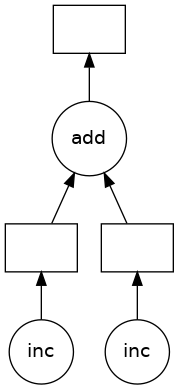

In [14]:
z.visualize()

Some questions to consider:

* Why did we go from 3s to 2s? Why weren’t we able to parallelize down to 1s? A: increment happened in parallel (two simultaneous operations), but then add also had to occur (one following operations). 
* What would have happened if the inc and add functions didn’t include the sleep(1)? Would Dask still be able to speed up this code?
* What if we have multiple outputs or also want to get access to x or y?

## Demonstration - Dask

We just used local threads to parallelize this operation. What are some other options for running our code?

[Dask Gateway](https://gateway.dask.org/) provides a way to connect to more than one machine running dask workers.

> Dask Gateway provides a secure, multi-tenant server for managing Dask clusters. It allows users to launch and use Dask clusters in a shared, centrally managed cluster environment, without requiring users to have direct access to the underlying cluster backend (e.g. Kubernetes, Hadoop/YARN, HPC Job queues, etc...).

We can see this in action using the [ESIP QHub deployment](https://jupyter.qhub.esipfed.org/) or a Pangeo Hub.

![esip-qhub-dask](images/esip-qhub-dask.png)

## ❓🤔❓ Question for the group

**What makes running code on a dask cluster different from running it in this notebook?**

## 🎁 Bonus

If we have time, go through Dask Tutorial from the [Pangeo Tutorial Gallery](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/).

*** 

# Want to learn more?

Join the Pangeo and ESIP Cloud Computing Cluster communities

* [Pangeo](https://pangeo.io/) is first and foremost a community promoting open, reproducible, and scalable science. This community provides documentation, develops and maintains software, and deploys computing infrastructure to make scientific research and programming easier. 
  * Visit the website or joing the community meetings: [Pangeo Community Meetings](https://pangeo.io/meeting-notes.html)
* Join the ESIP Cloud Computing Cluster for our next Knowledge Sharing Session on Apache Beam for Geospatial data
  * Cloud computing cluster email list: https://lists.esipfed.org/mailman/listinfo/esip-cloud
  * ESIP Slack and cloud computing cluster channel: https://bit.ly/3FtX1HV 

***

# Resources

## Examples + Tutorials of cloud computing

* [Notebook exploring the Landsat Collection 2 data on AWS using a Dask cluster via Coiled.io](https://github.com/Element84/geo-notebooks)
* [Pangeo Tutorial Gallery](http://gallery.pangeo.io/)

## ICESat-2

* [ICESat-2 AWS cloud data access (BETA ONLY)](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_cloud_data_access.html)

## Collections of tutorials

* [NASA Openscapes 2021 Cloud Hackathon Tutorials](https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials)
* [NASA Openscapes 2021 Cloud Workshop at AGU](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/)

I believe those notebooks will eventually be migrated to [Earthdata Cloud Cookbook: Supporting NASA Earth science research teams’ migration to the cloud](https://nasa-openscapes.github.io/earthdata-cloud-cookbook) but that website has placeholders for the content.

## Introduction to NASA Earthdata Cloud from PO.DAAC

* [Introduction: Access to PO.DAAC datasets in the cloud](https://podaac.jpl.nasa.gov/cloud-datasets/about)

## Tools for subsetting

* [rioxarray for Cloud-Optimized GeoTIFFs](https://corteva.github.io/rioxarray/stable/examples/COG.html)
* [Data Subsetting and Transformation Services in the Cloud: Using the Harmony-Py library to access customized data from NASA Earthdata](https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/07_Harmony_Subsetting.html)
* [xarray for Zarr](https://xarray.pydata.org/en/stable/generated/xarray.open_zarr.html)

## About COGs

* https://developmentseed.org/blog/2019-05-03-cog-talk-part-1-whats-new
* https://developers.planet.com/planetschool/an-introduction-to-cloud-optimized-geotiffs-cogs-part-1-overview/